<a href="https://colab.research.google.com/github/isaacchunn/SC1015_MiniPrj_Airbnb/blob/main/AirbnbAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Airbnb Prediction in Python (change this later to some title)

Dataset from Airbnb : **"Singapore, 29 December 2022"**  
Source: http://insideairbnb.com/get-the-data/

---

### Essential Libraries

Import essential libraries such as numpy, pandas, matplotlib and seaborn.

> NumPy : Library for Numeric Computations in Python  
> Pandas : Library for Data Acquisition and Preparation  
> Matplotlib : Low-level library for Data Visualization  
> Seaborn : Higher-level library for Data Visualization  

In [ ]:
# Isaac Chun Jun Heng U221389B
# J'sen Ong Jia Xuan
# TM.

In [ ]:
#Basic libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt #We only need pyplot
sb.set() #Set the default Seaborn style for graphics

### Additional Dependencies

In [126]:
!pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### Additional Libraries

In [127]:
from IPython import display
import folium
import geopandas


### General Utility Functions

In [ ]:
def countOutliers (df):
    #Get the q1 and q3 datas to find out the 25% and 75% range, then calculate inter quartile range and then find out whiskers.
    #Then count how many points lie outside of this range.
    q1 = df.quantile(0.25)
    q3 = df.quantile(0.75)
    #Interquartile
    iqr = q3 - q1
    #Calculate whiskers
    leftWhisker = q1 - (1.5 * iqr)
    rightWhisker = q3 + (1.5 * iqr)
    outliers = 0;
    #Loop through data now
    for data in df:
        if(data < leftWhisker or data > rightWhisker):
            outliers+=1

    return outliers

In [ ]:
def removeOutliers(df, colName):
  q1 = df[colName].quantile(0.25)
  q3 = df[colName].quantile(0.75)
  iqr = q3-q1
  low = q1 - 1.5 * iqr
  high = q3 + 1.5 * iqr
  result = df.loc[(df[colName] >= low) & (df[colName] <= high)]
  return result

#What is Airbnb?

Airbnb, Inc. is an American San Francisco-based company operating an online marketplace for short-term homestays and experiences. The company acts as a broker and charges a commission from each booking. The company was founded in 2008 by Brian Chesky, Nathan Blecharczyk, and Joe Gebbia.




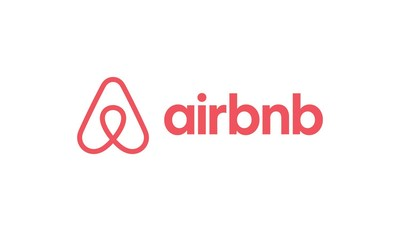

In [ ]:
display.Image("https://mma.prnewswire.com/media/1121685/Airbnb_Logo.jpg")

---

### Import the Dataset

In [116]:
#Import the dataset from github so its accessible (token first, when unprivate repo can remove token)
dataURL = "https://raw.githubusercontent.com/isaacchunn/SC1015_MiniPrj_Airbnb/main/listings.csv?token=GHSAT0AAAAAAB5LF54CAF6WHTGR7BWCU3EIZBF4KTA"
airDF = pd.read_csv(dataURL)
#airDF = pd.read_csv("listings.csv") #Uncomment if doing local
airDF.head()

id                          listing_url     scrape_id last_scraped  \
0   71609.0   https://www.airbnb.com/rooms/71609  2.022120e+13   12/29/2022   
1   71896.0   https://www.airbnb.com/rooms/71896  2.022120e+13   12/29/2022   
2   71903.0   https://www.airbnb.com/rooms/71903  2.022120e+13   12/29/2022   
3  275343.0  https://www.airbnb.com/rooms/275343  2.022120e+13   12/29/2022   
4  275344.0  https://www.airbnb.com/rooms/275344  2.022120e+13   12/29/2022   

        source                                       name  \
0  city scrape        Ensuite Room (Room 1 & 2) near EXPO   
1  city scrape            B&B  Room 1 near Airport & EXPO   
2  city scrape                 Room 2-near Airport & EXPO   
3  city scrape  Amazing Room with window 10min to Redhill   
4  city scrape          15 mins to Outram MRT Single Room   

                                         description  \
0  For 3 rooms.Book room 1&2 and room 4<br /><br ...   
1  <b>The space</b><br />Vocational Stay Deluxe B...   
2  Like your own home, 24hrs access.<br /><br /><...   
3  Awesome location and host <br />Room near INSE...   
4  Lovely home for the special guest !<br /><br /...   

                               neighborhood_overview  \
0                                                NaN   
1                                                NaN   
2  Quiet and view of the playground with exercise...   
3                                                NaN   
4       Bus stop <br />Food center <br />Supermarket   

                                         picture_url  host_id  ...  \
0  https://a0.muscache.com/pictures/24453191/3580...   367042  ...   
1  https://a0.muscache.com/pictures/2440674/ac4f4...   367042  ...   
2  https://a0.muscache.com/pictures/568743/7bc623...   367042  ...   
3  https://a0.muscache.com/pictures/miso/Hosting-...  1439258  ...   
4  https://a0.muscache.com/pictures/miso/Hosting-...  1439258  ...   

  review_scores_communication review_scores_location review_scores_value  \
0                        4.78                   4.26                4.32   
1                        4.43                   4.17                4.04   
2                        4.64                   4.50                4.36   
3                        4.42                   4.53                4.63   
4                        4.54                   4.62                4.46   

  license instant_bookable calculated_host_listings_count  \
0     NaN                f                              6   
1     NaN                t                              6   
2     NaN                f                              6   
3   S0399                f                             46   
4   S0399                f                             46   

  calculated_host_listings_count_entire_homes  \
0                                           0   
1                                           0   
2                                           0   
3                                           2   
4                                           2   

  calculated_host_listings_count_private_rooms  \
0                                            6   
1                                            6   
2                                            6   
3                                           44   
4                                           44   

  calculated_host_listings_count_shared_rooms reviews_per_month  
0                                           0              0.15  
1                                           0              0.17  
2                                           0              0.33  
3                                           0              0.19  
4                                           0              0.11  

[5 rows x 75 columns]

# Clean first, will put into another document called EDA to explain why we drop.

In [118]:
airDF.drop_duplicates(inplace=True)

In [119]:
airDF.shape

(3035, 75)

Test Map Visualization

In [ ]:
#Plot all first
lat_mean = airDF["latitude"].mean()
long_mean = airDF["longitude"].mean()
area_lat_long = pd.concat([airDF["latitude"],airDF["longitude"]], axis = 1)
area_lat_long = area_lat_long.values.tolist()


In [143]:
#Create the map
map = folium.Map(
    #Center the map here at location
    location = [lat_mean, long_mean], zoom_start = 12
)

#Plot all points
for point in range(0, len(area_lat_long)):
  _ = folium.Circle(
      radius = 10,
      location =  area_lat_long[point],
      popup = "{0}, {1},{2} \n{3}\n{4}".format(airDF["name"][point], area_lat_long[point][0], area_lat_long[point][1], airDF["listing_url"][point], airDF["host_neighbourhood"][point]),
      color = "crimson",
      fill = True).add_to(map)
map

In [174]:
geo = pd.read_csv("https://raw.githubusercontent.com/isaacchunn/SC1015_MiniPrj_Airbnb/main/geodata.csv?token=GHSAT0AAAAAAB5LF54CKSH2XC5WA3OAKV5IZBF6VWQ")
geo

HTTPError: ignored

In [175]:
geojson = geopandas.read_file("https://raw.githubusercontent.com/isaacchunn/SC1015_MiniPrj_Airbnb/main/sg.geojson?token=GHSAT0AAAAAAB5LF54COPWLKU42R3GLV3YGZBF62QA")
geojson

HTTPError: ignored

In [173]:
#Append the geometry
#Enumerate
#implementing combined coords into df
geodf = pd.DataFrame(geo)
geodf

town  latitude   longitude                 coordinates  \
0                ANG MO KIO  1.369115  103.845434      [1.369115, 103.845434]   
1                     BEDOK  1.323604  103.927341      [1.323604, 103.927341]   
2                    BISHAN  1.352585  103.835212      [1.352585, 103.835212]   
3               BUKIT BATOK  1.359029  103.763680       [1.359029, 103.76368]   
4               BUKIT MERAH  1.281905  103.823918      [1.281905, 103.823918]   
5             BUKIT PANJANG  1.377414  103.771950       [1.377414, 103.77195]   
6               BUKIT TIMAH  1.329411  103.802078      [1.329411, 103.802078]   
7   CENTRAL WATER CATCHMENT  1.355200  103.797200          [1.3552, 103.7972]   
8              CENTRAL AREA  1.284484  103.851345      [1.284484, 103.851345]   
9             CHOA CHU KANG  1.383980  103.746961       [1.38398, 103.746961]   
10                 CLEMENTI  1.316181  103.764938      [1.316181, 103.764938]   
11                  GEYLANG  1.320054  103.891775      [1.320054, 103.891775]   
12                  HOUGANG  1.361218  103.886253      [1.361218, 103.886253]   
13              JURONG EAST  1.332857  103.743552      [1.332857, 103.743552]   
14              JURONG WEST  1.340390  103.708988       [1.34039, 103.708988]   
15          KALLANG/WHAMPOA  1.324513  103.857225      [1.324513, 103.857225]   
16            MARINE PARADE  1.301969  103.897082      [1.301969, 103.897082]   
17                PASIR RIS  1.372094  103.947373      [1.372094, 103.947373]   
18                  PUNGGOL  1.398446  103.907205      [1.398446, 103.907205]   
19               QUEENSTOWN  1.294166  103.786127      [1.294166, 103.786127]   
20                SEMBAWANG  1.449111  103.818495      [1.449111, 103.818495]   
21                 SENGKANG  1.386812  103.891443      [1.386812, 103.891443]   
22                SERANGOON  1.355357  103.867871      [1.355357, 103.867871]   
23                 TAMPINES  1.349591  103.956788      [1.349591, 103.956788]   
24                TOA PAYOH  1.334304  103.856327      [1.334304, 103.856327]   
25                WOODLANDS  1.438192  103.788960       [1.438192, 103.78896]   
26                   YISHUN  1.430368  103.835363      [1.430368, 103.835363]   
27                   CHANGI  1.344953  103.982597  [1.344953236, 103.9825974]   
28               CHANGI BAY  1.322244  104.027783  [1.322243991, 104.0277835]   
29                   NOVENA  1.320859  103.842364  [1.320859422, 103.8423635]   
30               PAYA LEBAR  1.351609  103.899444  [1.351608824, 103.8994439]   
31                  SELETAR  1.405088  103.866992   [1.405087901, 103.866992]   
32                 BOON LAY  1.314289  103.708969  [1.314288526, 103.7089695]   
33                   TENGAH  1.355268  103.731731  [1.355267991, 103.7317311]   
34  WESTERN WATER CATCHMENT  1.347200  103.682500          [1.3472, 103.6825]   
35            DOWNTOWN CORE  1.287953  103.851784      [1.287953, 103.851784]   
36              MARINA EAST  1.291300  103.870900          [1.2913, 103.8709]   
37                   NEWTON  1.307600  103.840400          [1.3076, 103.8404]   
38                  ORCHARD  1.304800  103.831800          [1.3048, 103.8318]   
39             MARINA SOUTH  1.279300  103.870200          [1.2793, 103.8702]   
40                   MUSEUM  1.296681  103.848491  [1.296681306, 103.8484915]   
41             LIM CHU KANG  1.430500  103.717300          [1.4305, 103.7173]   
42                   MANDAI  1.426000  103.824100           [1.426, 103.8241]   
43    NORTH-EASTERN ISLANDS  1.406400  104.032300          [1.4064, 104.0323]   
44                  PIONEER  1.322781  103.678960  [1.322780809, 103.6789601]   
45         SOUTHERN ISLANDS  1.253700  103.825700          [1.2537, 103.8257]   
46                     TUAS  1.294900  103.630500          [1.2949, 103.6305]   
47                  SIMPANG  1.444300  103.842800          [1.4443, 103.8428]   
48             SUNGEI KADUT  1.407400  103.756200     

In [166]:
choro_test = folium.Choropleth(geo_data = geojson,
            data = geodf,
            columns = ['town'],
            key_on = 'features.properties.name',#pathway to locate each town and its geometry in the geojson file
            fill_color = 'YlGnBu', # colour of choropleth
            nan_fill_color = "White", # color for empty data
            fill_opacity = 0.7, #density of colour
            line_opacity = 0.2,
            line_color = 'black',
            nan_fill_opacity = 0.3).add_to(map)

map

IndexError: ignored